In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss, roc_auc_score, RocCurveDisplay, roc_curve

In [44]:
# VALIDATION RESULTS

y_predtot=np.zeros(2358)
y_probatot=np.zeros(2358)
y_testtot=np.zeros(2358)
y_results=pd.DataFrame()
max=2

for i in range(1,max):
    for k in range(1,11):
        tempdf=pd.read_csv('Run_'+str(i)+'\\y_results_cvsplit'+str(k)+'.csv',index_col=0)
        y_results=pd.concat((y_results,tempdf))
    y_predtot += np.array(y_results['y_pred'])
    y_testtot += np.array(y_results['y_test'])
    y_probatot += np.array(y_results['y_proba_1'])

y_pred=y_predtot/((max-1))
y_test=y_testtot/((max-1))
y_proba=y_probatot/((max-1))


In [ ]:

fig, ax = plt.subplots()

ax.hist(y_results['y_proba_0'].loc[y_results['y_test']==1],density=True,histtype='step')
ax.hist(y_results['y_proba_0'].loc[y_results['y_test']==0],density=True,histtype='step')
plt.show()

[]

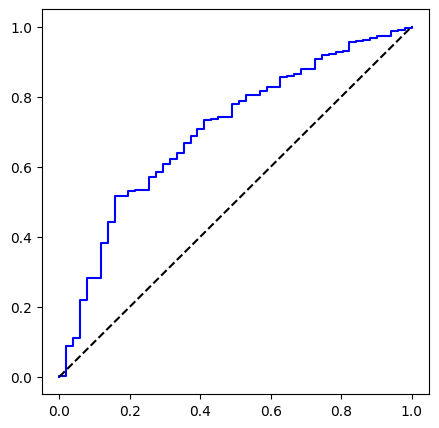

In [27]:
y_test=y_results['y_test']
y_pred=y_results['y_pred']
y_proba=y_results['y_proba_1']

accuracy = accuracy_score(y_test, y_pred)*100
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc_weightedavg = roc_auc_score(y_test,y_pred,average='weighted')
logloss = log_loss(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_proba)

resultcols = ['Accuracy', 'ROC AUC', 'ROC Weighted Av', 'Logarithmic Loss', 
        'F1 Score', 'CMatrix11','CMatrix12', 'CMatrix21', 'CMatrix22']
resultarray = np.array((accuracy,roc_auc,roc_auc_weightedavg,logloss,f1,
                        confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]))
rocresultcols = ['FPR','TPR','Thresholds']
rocresultarray = np.array([fpr,tpr,thresholds])
#print(rocresultarray)
results = pd.DataFrame([resultarray],columns=resultcols)
rocresults = pd.DataFrame(np.array([fpr,tpr,thresholds]).transpose(),columns=rocresultcols)

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(fpr,tpr,color='blue',label='Direct Classifier')
ax.plot([0,1],[0,1],color='black',linestyle='--',label='Random Classifier')
ax.plot()